## IS 362 Final Project 
## Filming In NYC

*** For my final project I will be exploring the most-filmed locations in NYC and the most popular filming categories and times to film. The data I will be using will originate from the film permits issued by the NYC Mayor's Office of Film, Theatre and Broadcasting between 2012 - 2017. ***

Data source: NYC Open Data, https://data.cityofnewyork.us/City-Government/Film-Permits/tg4x-b46p


In [2]:
# First we will import the resources & display the info
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('C:\Users\Koowii\Desktop\Film_Permits.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49063 entries, 0 to 49062
Data columns (total 14 columns):
EventID              49063 non-null int64
EventType            49063 non-null object
StartDateTime        49063 non-null object
EndDateTime          49063 non-null object
EnteredOn            49063 non-null object
EventAgency          49063 non-null object
ParkingHeld          49063 non-null object
Borough              49063 non-null object
CommunityBoard(s)    49052 non-null object
PolicePrecinct(s)    49052 non-null object
Category             49063 non-null object
SubCategoryName      49063 non-null object
Country              49063 non-null object
ZipCode(s)           49052 non-null object
dtypes: int64(1), object(13)
memory usage: 5.2+ MB


**Next we will clean up the data**

In [3]:
# THe code below will remove the unnecessary columns
df = df.sort_values(df.columns[0], ascending="True") # sort by EventId
df = df.reset_index(drop=True)
df = df.drop(["EventAgency","CommunityBoard(s)","PolicePrecinct(s)","Country"], axis=1) # drop the unused categories

In [4]:
df.columns = ['id','event','start','end','enteredon','parkingheld','borough','category','subcategory','zipcode']
df.head(14)

,id,event,start,end,enteredon,parkingheld,borough,category,subcategory,zipcode
0,42069,Theater Load in and Load Outs,01/02/2012 07:00:00 AM,01/27/2012 10:00:00 PM,12/07/2011 04:38:54 PM,WEST 44 STREET between 7 AVENUE and 8 AVENUE,Manhattan,Theater,Theater,10036
1,42287,Shooting Permit,01/05/2012 01:00:00 PM,01/05/2012 11:30:00 PM,12/09/2011 02:08:35 PM,WEST 65 STREET between BROADWAY and WEST END...,Manhattan,Theater,Theater,10023
2,42581,Shooting Permit,01/03/2012 10:00:00 AM,01/03/2012 09:00:00 PM,12/14/2011 09:56:47 AM,"46 ROAD between 5 STREET and VERNON BOULEVARD,...",Queens,Television,Episodic series,11101
3,42727,Shooting Permit,01/03/2012 08:00:00 AM,01/03/2012 10:00:00 PM,12/15/2011 01:27:48 PM,22ND STREET between QUEENS PLAZA SOUTH and 43R...,Queens,Television,Episodic series,11101
4,42737,Theater Load in and Load Outs,01/02/2012 06:00:00 AM,01/18/2012 08:00:00 PM,12/15/2011 02:06:52 PM,WEST 46 STREET between 7 AVENUE and 8 AVENUE,Manhattan,Theater,Theater,10036
5,42780,Theater Load in and Load Outs,01/02/2012 06:00:00 PM,01/03/2012 12:00:00 AM,12/15/2011 05:47:56 PM,WEST 56 STREET between 7 AVENUE and 6 AVENUE,Manhattan,Theater,Theater,10019
6,42781,Theater Load in and Load Outs,01/03/2012 12:00:00 AM,01/03/2012 06:00:00 PM,12/15/2011 05:52:18 PM,WEST 56 STREET between 7 AVENUE and 6 AVENUE,Manhattan,Theater,Theater,10019
7,42804,Shooting Permit,01/09/2012 06:30:00 AM,01/09/2012 09:00:00 PM,12/16/2011 11:30:58 AM,EAGLE STREET between WEST STREET and FRANKLIN ...,Brooklyn,Television,Episodic series,11222
8,42825,Shooting Permit,01/04/2012 07:00:00 AM,01/04/2012 10:00:00 PM,12/16/2011 03:04:01 PM,EAST 12 STREET between 4 AVENUE and 3 AVENUE...,Manhattan,Television,Episodic series,10003
9,42847,Shooting Permit,01/03/2012 07:00:00 AM,01/04/2012 11:00:00 PM,12/16/2011 07:35:40 PM,STARR AVENUE between VAN DAM STREET and BORDEN...,Queens,Television,Episodic series,11101


** Next I Will Display The Most Popular Filming Month**

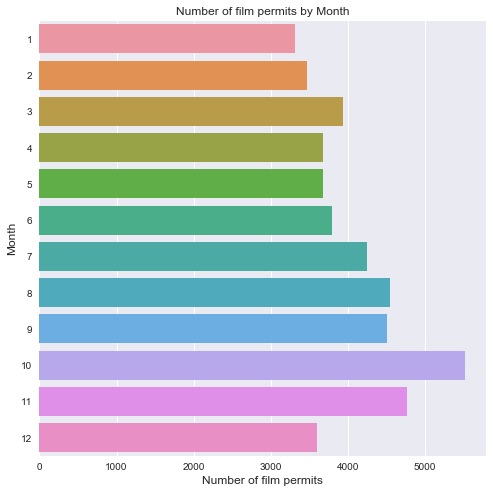

In [5]:
df['month'] = pd.DatetimeIndex(df['start']).month
df['month'].value_counts(dropna = False)

plt.figure(figsize = (8,8))
pic1 = sns.countplot(y="month", data=df)
pic1.set_title("Number of film permits by Month")
pic1.set_xlabel("Number of film permits", fontsize=12)
pic1.set_ylabel("Month", fontsize=12)

plt.show()

** Next I Will Display The Borough with Highest Number of Permits Issued**

In [6]:
bo = df["borough"].value_counts(dropna =False)

In [7]:
#The code below will display number of permits by borough
borough_counts = df["borough"].value_counts(dropna =False)

print("Number of permits by Borough")
print(borough_counts)

Number of permits by Borough
Manhattan        24596
Brooklyn         14856
Queens            7674
Bronx             1335
Staten Island      602
Name: borough, dtype: int64


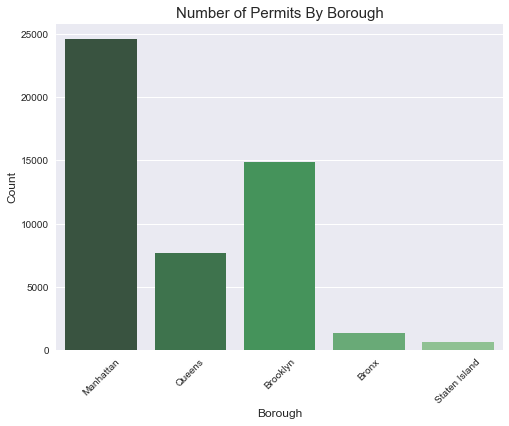

In [8]:
plt.figure(figsize = (8,6))
ax1 = sns.countplot(x="borough", data=df, palette="Greens_d")
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
ax1.set_title("Number of Permits By Borough", fontsize=15)
ax1.set_xlabel("Borough", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

plt.show()

** Next I will figure out the most popular categories of film permits** 

In [9]:
# The code below will display unique permit types by category
print("Types of Film Permits and Their Popularity")
categories = pd.DataFrame(df.category.value_counts().reset_index())
categories.columns = ['category', 'count']
categories.head(10)

Types of Film Permits and Their Popularity


,category,count
0,Television,26407
1,Film,8550
2,Theater,4553
3,Commercial,4171
4,Still Photography,3063
5,WEB,1652
6,Student,321
7,Documentary,190
8,Music Video,155
9,Red Carpet/Premiere,1


# Conclusion

***After analyzing and manipulationg the data, I can conclude that:***

***The most popular filming month in NYC is October, which is probably due to the nice weather. The least popular months are January and december which are also the coldest.***

***The most number of filming permits are for locations in Manhattan, which is also the most popular borough.***

***The most popular filming category is television, which accounts for 58% of all filming.***